In [4]:
##reading data
import json
import pandas as pd

filename='survey-patient-satisfaction.json'
with open(filename, 'r', encoding="utf8") as f:
        data_json = json.load(f)

df = pd.DataFrame(data_json)


In [64]:
# all column names
list(df)

['prescription_id',
 'আপনার শারীরিক পরীক্ষা এবং ডাক্তারের সাথে আলাপ কি সবার সামনে হয়েছে নাকি আলাদা ঘরে হয়েছে ?',
 'আপনি কার পরামর্ষে এই সেবা টা গ্রহন করতে আসলেন ?',
 'আপনি কি ওষুধপত্র সব কিনেছেন ?',
 'আপনি কে বলছেন ?',
 'আপনি ডাক্তারের ফি কত দিয়েছিলেন ?',
 'ঢাকার ডাক্তার কি আপনাকে ঠিক ভাবে সালাম দিয়েছে ?',
 'ঢাকার ডাক্তার কি আপনার অসুখ আপনাকে বুঝিয়েছে ?',
 'ঢাকার ডাক্তারের এর ব্যবহার কেমন লেগেছে ?',
 'পল্লীচিকিৎসক এর ব্যবহার কেমন লেগেছে ?',
 'পল্লীচিকিৎসক কি আপনাকে ঔষধপত্র ঠিক মত বুঝিয়েছে ?',
 'প্রযত্ন সেন্টার কি পরিষ্কার-পরিচ্ছন্ন ছিল নাকি নোংরা, ময়লা হয়ে ছিল?',
 'সব মিলায় আপনার কত টাকা খরচ হয়েছিল ?',
 'সে কি আপনাকে ঠিক ভাবে বিদায় দিয়েছে ?',
 'সে কি আপনার সাথে আন্তরিকভাবে কথা বলেছে ?',
 'সে কি কথা বলার সময় বিরক্ত হয়ে ছিল ?',
 'সে কি ত্বরা হুড়া করেছিল আপনার সাথে কথা বলার সময় ?',
 'সেবাটা আপনার কেমন লেগেছে ?']

In [221]:
# making simplified column names keeping the serial of original question set
simplified_columns=['p_id',#'prescription_id',
 'exam_place',#'আপনার শারীরিক পরীক্ষা এবং ডাক্তারের সাথে আলাপ কি সবার সামনে হয়েছে নাকি আলাদা ঘরে হয়েছে ?',
 'referrer',#'আপনি কার পরামর্ষে এই সেবা টা গ্রহন করতে আসলেন ?',
 'all_medicine',#'আপনি কি ওষুধপত্র সব কিনেছেন ?',
 'interviewee',#'আপনি কে বলছেন ?',
 'fee',#'আপনি ডাক্তারের ফি কত দিয়েছিলেন ?',
 'salam_dhaka',#'ঢাকার ডাক্তার কি আপনাকে ঠিক ভাবে সালাম দিয়েছে ?',
 'medicine_explained_dhaka',#'ঢাকার ডাক্তার কি আপনার অসুখ আপনাকে বুঝিয়েছে ?',
 'behavior_dhaka',#'ঢাকার ডাক্তারের এর ব্যবহার কেমন লেগেছে ?',
 'behavior_local',#'পল্লীচিকিৎসক এর ব্যবহার কেমন লেগেছে ?',
 'medicine_explained_local',#'পল্লীচিকিৎসক কি আপনাকে ঔষধপত্র ঠিক মত বুঝিয়েছে ?',
 'environment',#'প্রযত্ন সেন্টার কি পরিষ্কার-পরিচ্ছন্ন ছিল নাকি নোংরা, ময়লা হয়ে ছিল?',
 'total_cost',#'সব মিলায় আপনার কত টাকা খরচ হয়েছিল ?',
 'proper_bye',#'সে কি আপনাকে ঠিক ভাবে বিদায় দিয়েছে ?',
 'generous_talk',#'সে কি আপনার সাথে আন্তরিকভাবে কথা বলেছে ?',
 'irritated_talk',#'সে কি কথা বলার সময় বিরক্ত হয়ে ছিল ?',
 'hurried_talk',#'সে কি ত্বরা হুড়া করেছিল আপনার সাথে কথা বলার সময় ?',
 'over_all_service',#'সেবাটা আপনার কেমন লেগেছে ?'
                   ]
df.columns=simplified_columns

In [231]:
## encoding responses
from sklearn import preprocessing
response_maps={}
def encode_response(col):
    le = preprocessing.LabelEncoder()
    responses = col.unique()
    le.fit(responses)
    simple_response=le.transform(responses)
    response_map={k:v for (k,v) in zip(simple_response, responses)}    
    transformed = le.transform(col)
    response_maps[col.name]=response_map
    return transformed






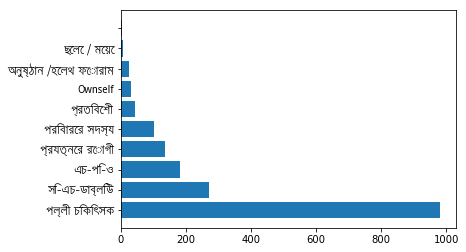

In [222]:
#max_referrer
# -*- coding: utf-8 -*-
from collections import Counter
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
prop = fm.FontProperties(fname='Siyamrupali.ttf')

plt.barh(range(10),df.referrer.value_counts()[:10].tolist())

labels=list(df.referrer.value_counts()[:10].index)

plt.yticks(range(10),labels, fontproperties=prop)

plt.show()

I'm now going to see if it's possible to make prediction whether the person bought all medicine or not from some factors

In [223]:
#converting medicine response from text to numerical
df.all_medicine=response_encoder(df.all_medicine)

df.all_medicine.value_counts()

2    977
1    817
0     12
Name: all_medicine, dtype: int64

In [224]:
#to make a sense of these responses
response_maps['all_medicine']

{0: 0, 1: 1, 2: 2}

In [228]:
#let's just extract only responses with হা and না
mask = (df.all_medicine == 1) | (df.all_medicine == 2) 
medicine_case=df[mask]

In [229]:
#droping some columns
droppable_columns=['p_id','referrer', 'fee', 'total_cost', 'interviewee','over_all_service']

medicine_case_clean=medicine_case.drop(droppable_columns, axis=1)

In [230]:
list(medicine_case_clean)

['exam_place',
 'all_medicine',
 'salam_dhaka',
 'medicine_explained_dhaka',
 'behavior_dhaka',
 'behavior_local',
 'medicine_explained_local',
 'environment',
 'proper_bye',
 'generous_talk',
 'irritated_talk',
 'hurried_talk']

In [236]:
#conveting all responses to numeric
for col_name in list(medicine_case_clean):
    medicine_case_clean[col_name]=encode_response(medicine_case_clean[col_name])

In [241]:
#splitting feature and label
X=medicine_case_clean.drop(['all_medicine'], axis=1)
y=medicine_case_clean.all_medicine

In [244]:
#splitting test and train
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


#clf = svm.SVC(kernel='linear', C=1,degree=3)
clf = neighbors.KNeighborsClassifier(n_neighbors=30, leaf_size=100, algorithm='kd_tree', p=3)
scores = cross_val_score(clf, X, y, cv=10)

scores


array([ 0.6       ,  0.53333333,  0.66111111,  0.66111111,  0.59444444,
        0.58333333,  0.76111111,  0.70786517,  0.80337079,  0.80898876])

In [247]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

clf = MLPClassifier(hidden_layer_sizes=(500,), solver="lbfgs", verbose=True)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)

correct=0
#print(pred)

ytest=y_test.tolist()

corr=0
for i in range(len(pred)):
    if pred[i]==ytest[i]:
        corr+=1
        
print("Accuracy:",corr/len(pred))


Accuracy: 0.7632311977715878


As MLP gave some bump, let's see how does it actually looks

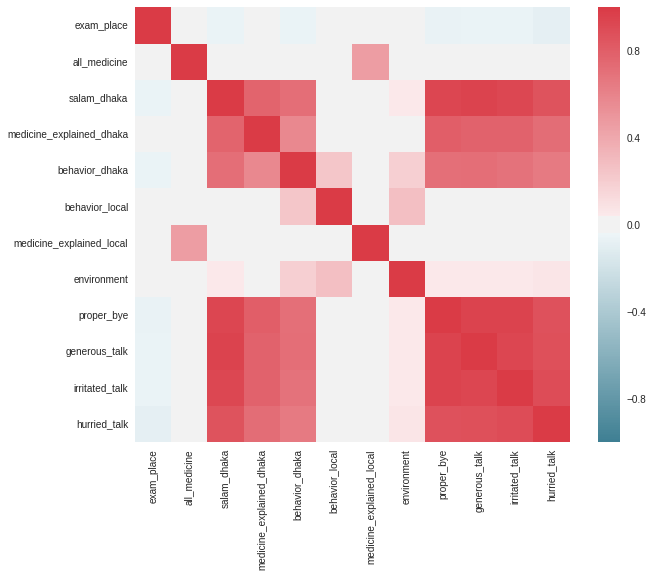

In [256]:
import seaborn as sns
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
corr = medicine_case_clean.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

From this plot it looks like , there might be some correlation between 'buying of all medicines' when medicines are explained by 'local_representative'.  

### Now I'm trying to see if its possible to make prediction about diagnosis with symptoms

In [114]:
from pandas.io.json import json_normalize
from flatten_json import flatten
from sklearn import preprocessing
from pprint import pprint
import pandas as pd
presription_file = 'prescription-corpus-survey-2012-12-08.json'

with open(presription_file, 'r', encoding="utf-8") as f:
    presciption_json = json.load(f)

normalized = json_normalize(presciption_json)
pprint(normalized.columns)

Index(['_id.$oid', 'appointment.booking_date', 'appointment.booking_duration',
       'appointment.id.$oid', 'appointment.images.count',
       'appointment.slot_end_time', 'appointment.slot_start_time',
       'appointment.symptoms', 'appointment.vitals.bp_diastole',
       'appointment.vitals.bp_systole', 'appointment.vitals.glucose',
       'appointment.vitals.pulse', 'appointment.vitals.temperature',
       'appointment.vitals.weight', 'doctor.credentials', 'doctor.id.$oid',
       'doctor.name', 'doctor.registration_date', 'doctor.specialization',
       'feedback.doctor.rating', 'feedback.doctor.red_flags',
       'feedback.id.$oid', 'feedback.rmp.rating', 'feedback.rmp.red_flags',
       'patient.age_now', 'patient.age_then', 'patient.birth_date',
       'patient.id.$oid', 'patient.registration_date',
       'patient.registration_duration', 'patient.sex', 'patient.village',
       'prescription.advices', 'prescription.complaints',
       'prescription.consultation_date', 'prescr

In [115]:
#selecting just symptoms and diagnosises
symptom_diagnosis  = normalized[['prescription.rmp_symptoms',
                                 'prescription.diagnoses.provisional', 
                                 'prescription.diagnoses.final']]
import numpy as np


#taking only mutually non empty symptoms and diagnosises
cleaned_symptom_diagnosis=symptom_diagnosis[(symptom_diagnosis['prescription.rmp_symptoms'].str.len()!=0) & \
                    (symptom_diagnosis['prescription.diagnoses.final'].str.len()!=0)] 


In [116]:
cleaned_symptom_diagnosis.shape

(49, 3)